# Milestone 1

# Introduction

Nama: Karina Maharani Utomo
<br>
Batch: 003
<br>
Hactiv8 Full Time Data Science

Milestone Project ini menggunakan dataset yang dapat diakses [disini](https://www.kaggle.com/blastchar/telco-customer-churn)

Isi dari dataset adalah sebagai berikut:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Objektif dari Milestone Project ini adalah membuat model untuk memprediksi apakah seorang pelanggan akan meninggalkan layanan yang mereka pakai


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import FeatureUnion

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_auc_score, recall_score

# Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/data hacktiv8/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

Dataset ini memiliki 7043 baris dan 21 kolom

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


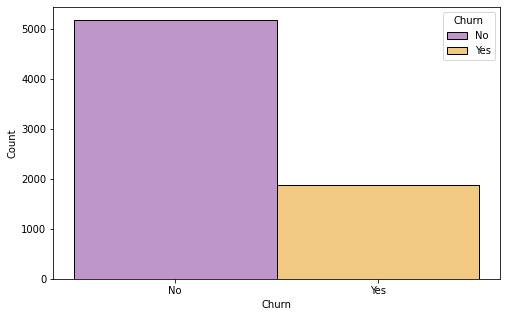

Churn   : 1869  (26.537 %)
No Churn: 5174 (73.463 %)


In [7]:
plt.figure(figsize = (8,5))
sns.histplot(data = data, x = data['Churn'], hue = data['Churn'], palette = 'CMRmap')
plt.show()

t1 = data[data['Churn'] == 'Yes']['customerID'].count()
t0 = data[data['Churn'] == 'No']['customerID'].count()
length = len(data)

print(f'Churn   : {t1}  ({((t1/length)*100).round(3)} %)')
print(f'No Churn: {t0} ({((t0/length)*100).round(3)} %)')

Dapat dilihat bahwa ini merupakan dataset yang imbalanced. Dengan jumlah data Churn sebanyak 1869 dan yang tidak Churn sebanyak 5174

# Data Cleaning

In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Secara sekilas, dataset ini tidak memiliki missing value. Hal ini akan ditinjau lebih lanjut

In [9]:
data.duplicated().sum()

0

Dataset tidak memiliki data duplikat

In [10]:
data.drop('customerID', axis = 1, inplace = True)

Diputuskan untuk drop kolom `customerID` karena bersifat unik dan berperan seperti index

In [11]:
# Melihat kolom kategorikal

objects = data.select_dtypes(include=['object']).copy()
objects.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# Melihat unique value setiap kolom kategorikal

for col in objects:
    print(col)
    print(objects[col].unique())
    print()

gender
['Female' 'Male']

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn
['No' 'Yes']



In [13]:
# Melihat value dari kolom TotalCharges

data['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.9        8
19.65       8
           ..
1495.1      1
1652.95     1
147.5       1
563.65      1
499.4       1
Name: TotalCharges, Length: 6531, dtype: int64

Dapat dilihat bahwa ada 11 data pada kolom `TotalCharges` yang sepertinya diisi dengan spasi. 11 baris tersebut akan diperlakukan seperti missing value dan akan dihapus karena jumlahnya sedikit

In [14]:
data.drop(data.loc[data['TotalCharges']==' '].index, inplace=True)
data['TotalCharges'].value_counts()

20.2       11
19.75       9
20.05       8
19.65       8
19.9        8
           ..
1495.1      1
1652.95     1
147.5       1
563.65      1
499.4       1
Name: TotalCharges, Length: 6530, dtype: int64

In [15]:
data.shape

(7032, 20)

Dataset sekarang memiliki 7032 baris dan 20 kolom

In [16]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

Type dari kolom `TotalCharges` akan diubah dari object menjadi float karena value dari kolom tersebut berupa angka desimal

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# Data Exploration

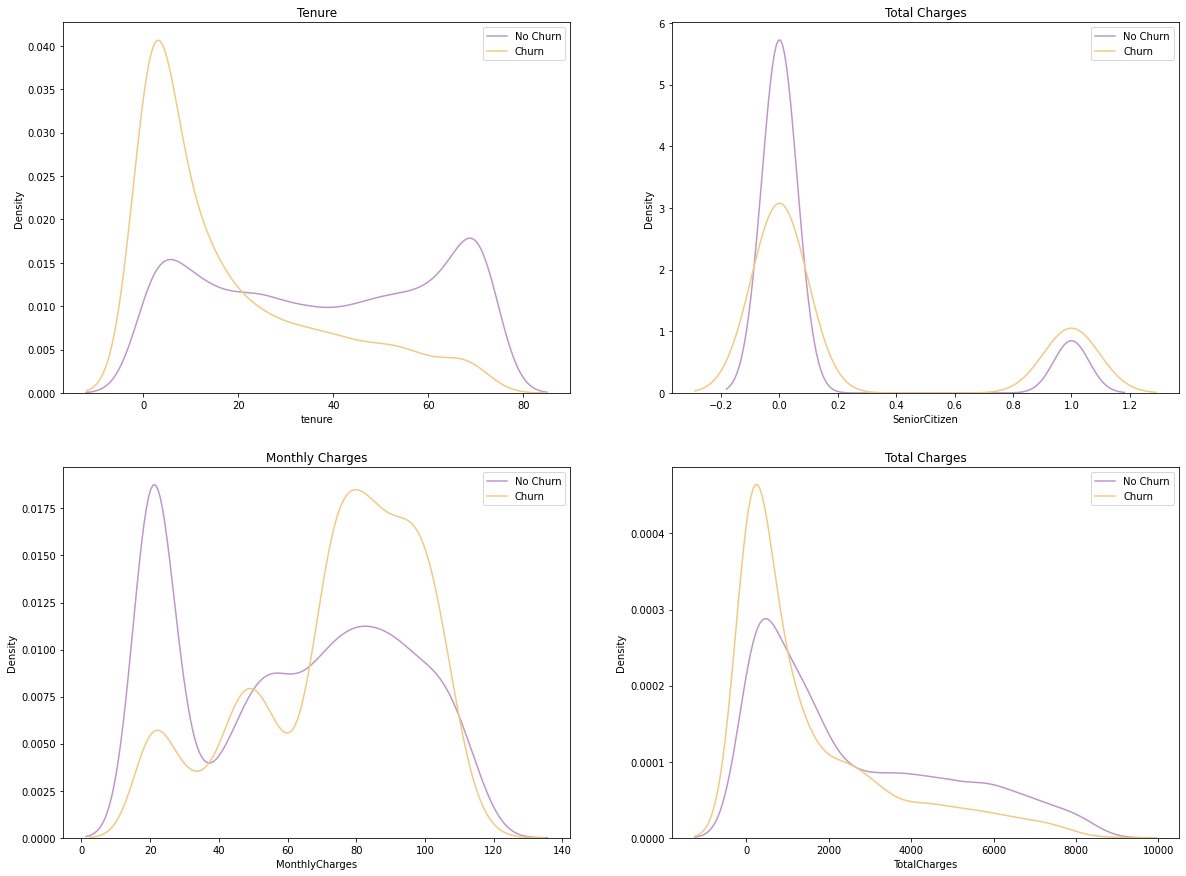

In [18]:
fig = plt.figure(figsize=(20,15))
row = 2
col = 2

fig.add_subplot(row, col, 1)
sns.kdeplot(data.loc[(data['Churn'] == 'No'), 'tenure'], color = '#bf96c9', label = 'No Churn')
sns.kdeplot(data.loc[(data['Churn'] == 'Yes'), 'tenure'], color = '#f2c983', label = 'Churn')
plt.title('Tenure')
plt.legend()

fig.add_subplot(row, col, 2)
sns.kdeplot(data.loc[(data['Churn'] == 'No'), 'SeniorCitizen'], color = '#bf96c9', label = 'No Churn')
sns.kdeplot(data.loc[(data['Churn'] == 'Yes'), 'SeniorCitizen'], color = '#f2c983', label = 'Churn')
plt.title('Total Charges')
plt.legend()

fig.add_subplot(row, col, 3)
sns.kdeplot(data.loc[(data['Churn'] == 'No'), 'MonthlyCharges'], color = '#bf96c9', label = 'No Churn')
sns.kdeplot(data.loc[(data['Churn'] == 'Yes'), 'MonthlyCharges'], color = '#f2c983', label = 'Churn')
plt.title('Monthly Charges')
plt.legend()

fig.add_subplot(row, col, 4)
sns.kdeplot(data.loc[(data['Churn'] == 'No'), 'TotalCharges'], color = '#bf96c9', label = 'No Churn')
sns.kdeplot(data.loc[(data['Churn'] == 'Yes'), 'TotalCharges'], color = '#f2c983', label = 'Churn')
plt.title('Total Charges')
plt.legend()

plt.show()

Dari plot kolom numerikal, dapat dilihat bahwa:
- Untuk kolom `tenure`, data pelanggan yang Churn cenderung memiliki tenure yang lebih rendah
- Pelanggan yang Tidak Churn kebanyakan bukan tergolong sebagai lansia
- Data pelanggan Churn memiliki monthly charges yang lebih tinggi
- Akan tetapi, apabila dilihat dari `TotalCharges`, data pelanggan Churn memiliki total yang lebih rendah

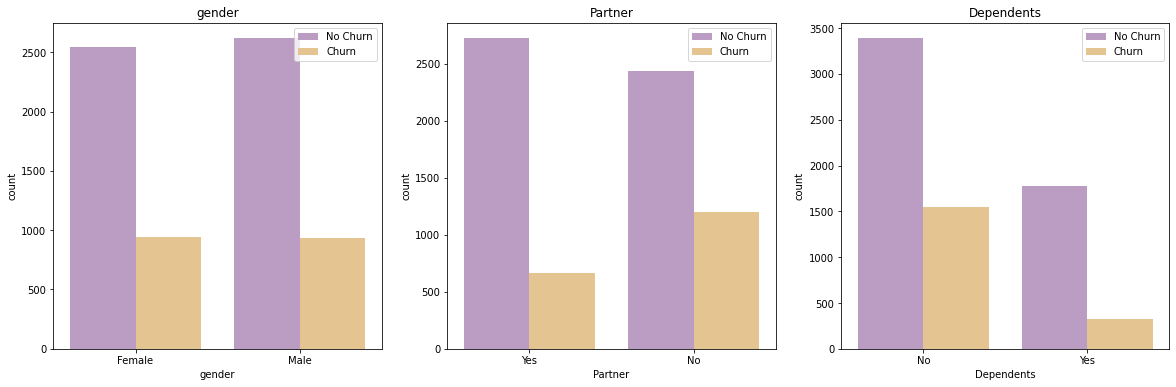

In [19]:
demographic = data[['gender', 'Partner', 'Dependents']]

plt.figure(figsize=(20,6))

for i, col in enumerate(list(demographic.columns)):
    i += 1
    plt.subplot(1,3,i)
    sns.countplot(x = demographic[col], hue = data['Churn'], palette = ['#bf96c9' ,'#f2c983'])
    plt.legend(['No Churn', 'Churn'])
    plt.title(col)

Dari data demographic pelanggan, dapat dilihat bahwa:
- Data pelanggan wanita dan pria seimbang
- Data pelanggan Churn lebih banyak yang tidak memiliki partner ataupun dependents

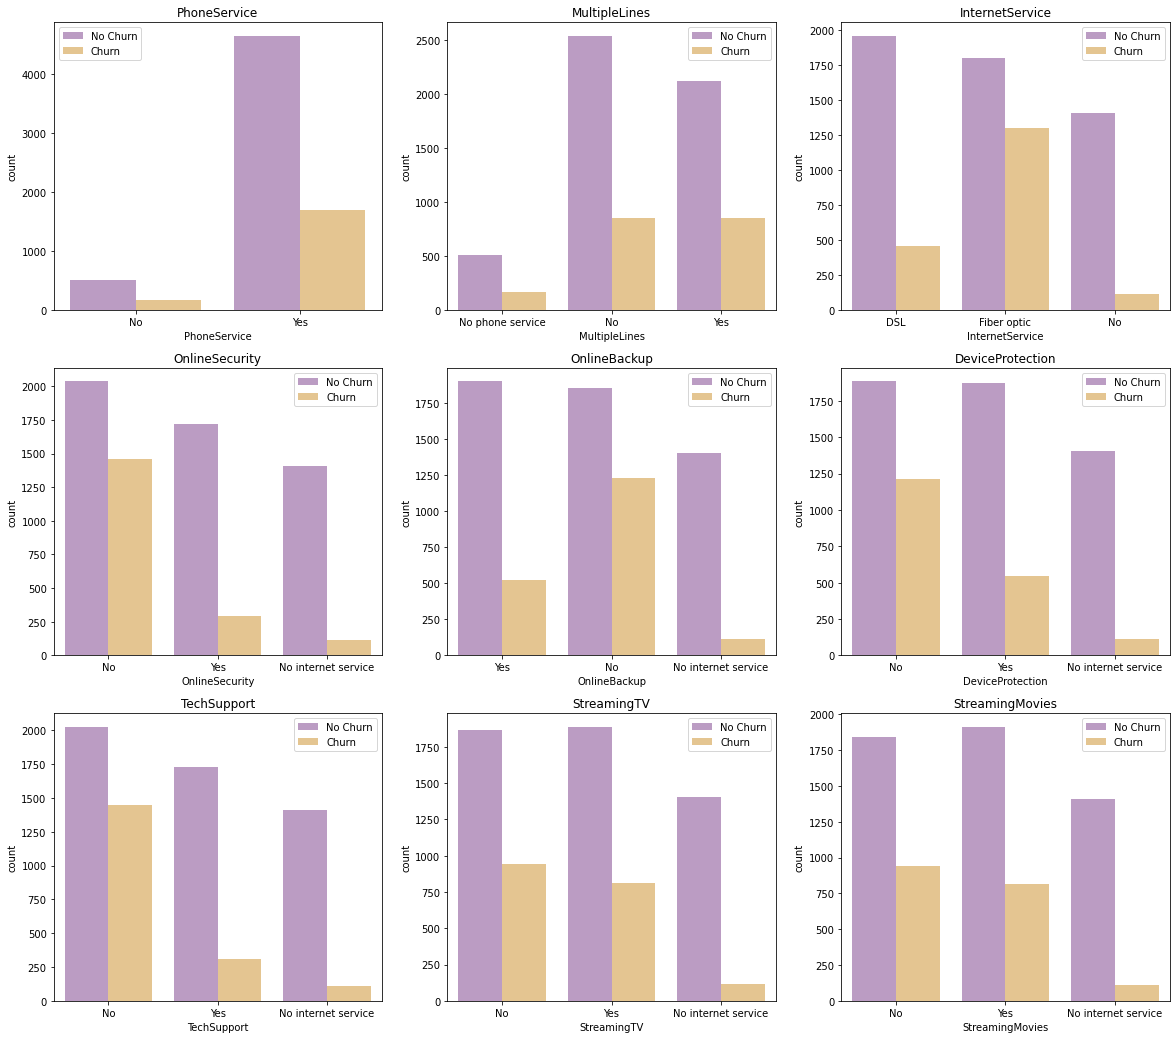

In [20]:
services = data[['PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                 'TechSupport', 'StreamingTV', 'StreamingMovies']]

plt.figure(figsize=(20,18))

for i, col in enumerate(list(services.columns)):
    i += 1
    plt.subplot(3,3,i)
    sns.countplot(x = services[col], hue = data['Churn'], palette = ['#bf96c9' ,'#f2c983'])
    plt.legend(['No Churn', 'Churn'])
    plt.title(col)

Dari data layanan yang tersedia, dapat dilihat bahwa pelanggan yang Churn banyak yang:
- Berlangganan internet fiber optic
- Tidak memiliki online security
- Tidak memiliki online backup
- Tidak memiliki device protection
- Tidak memiliki tech support

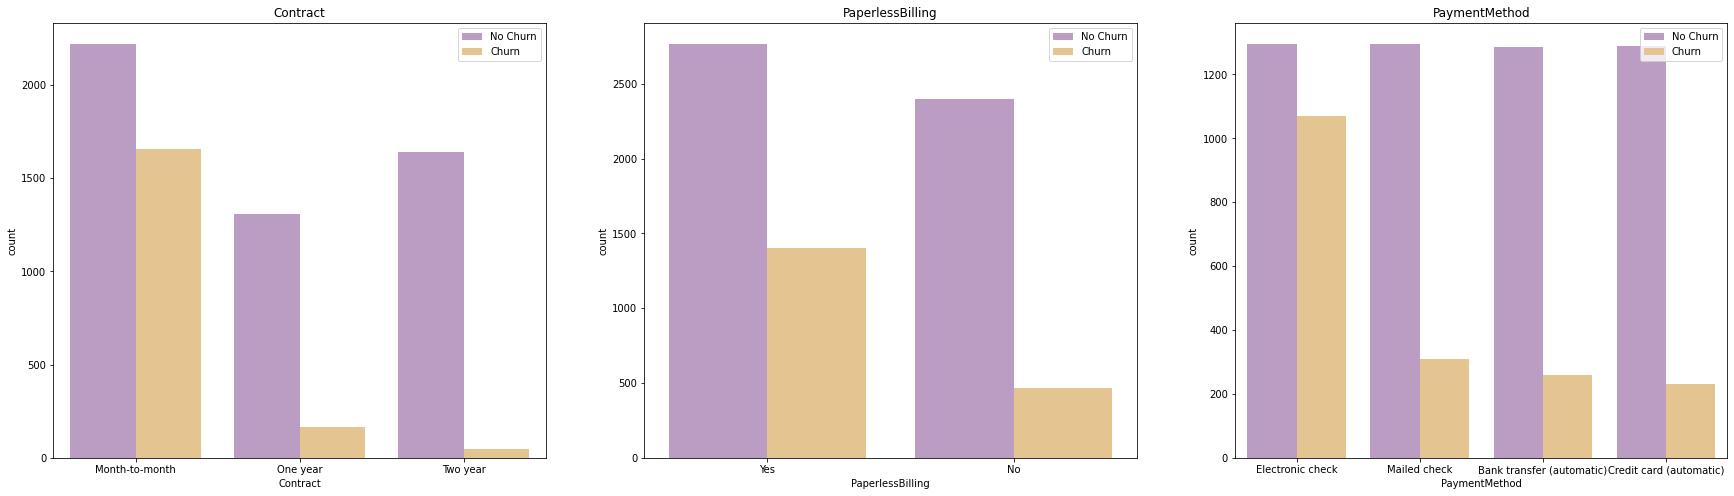

In [21]:
account_info = data[['Contract', 'PaperlessBilling', 'PaymentMethod']]

plt.figure(figsize=(30,8))

for i, col in enumerate(list(account_info.columns)):
    i += 1
    plt.subplot(1,3,i)
    sns.countplot(x = account_info[col], hue = data['Churn'], palette = ['#bf96c9' ,'#f2c983'])
    plt.legend(['No Churn', 'Churn'])
    plt.title(col)

Dari account info pelanggan, dapat dilihat bahwa pelanggan yang Churn banyak yang:
- Berlangganan bulanan
- Menerima bill secara elektronik
- Melakukan pembayaran melalui electronic check

Selanjutnya, akan dilihat korelasi dari masing-masing kolom. Akan dilakukan proses label encoding terlebih dahulu agar heatmap lebih enak dilihat

In [22]:
lb_en = LabelEncoder()

data_corr = data.copy()
objects_corr = data_corr.select_dtypes(include=['object']).copy()

def encode(col):
  objects_corr.loc[:, col] = lb_en.fit_transform(objects_corr.loc[:, col])
  return()

for col in objects_corr.columns:
  encode(col)

objects_corr.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [23]:
nums_corr = data_corr.select_dtypes(include=['int', 'float']).copy()
nums_corr.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [24]:
data_corr = pd.concat([nums_corr, objects_corr], axis = 1)
data_corr.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


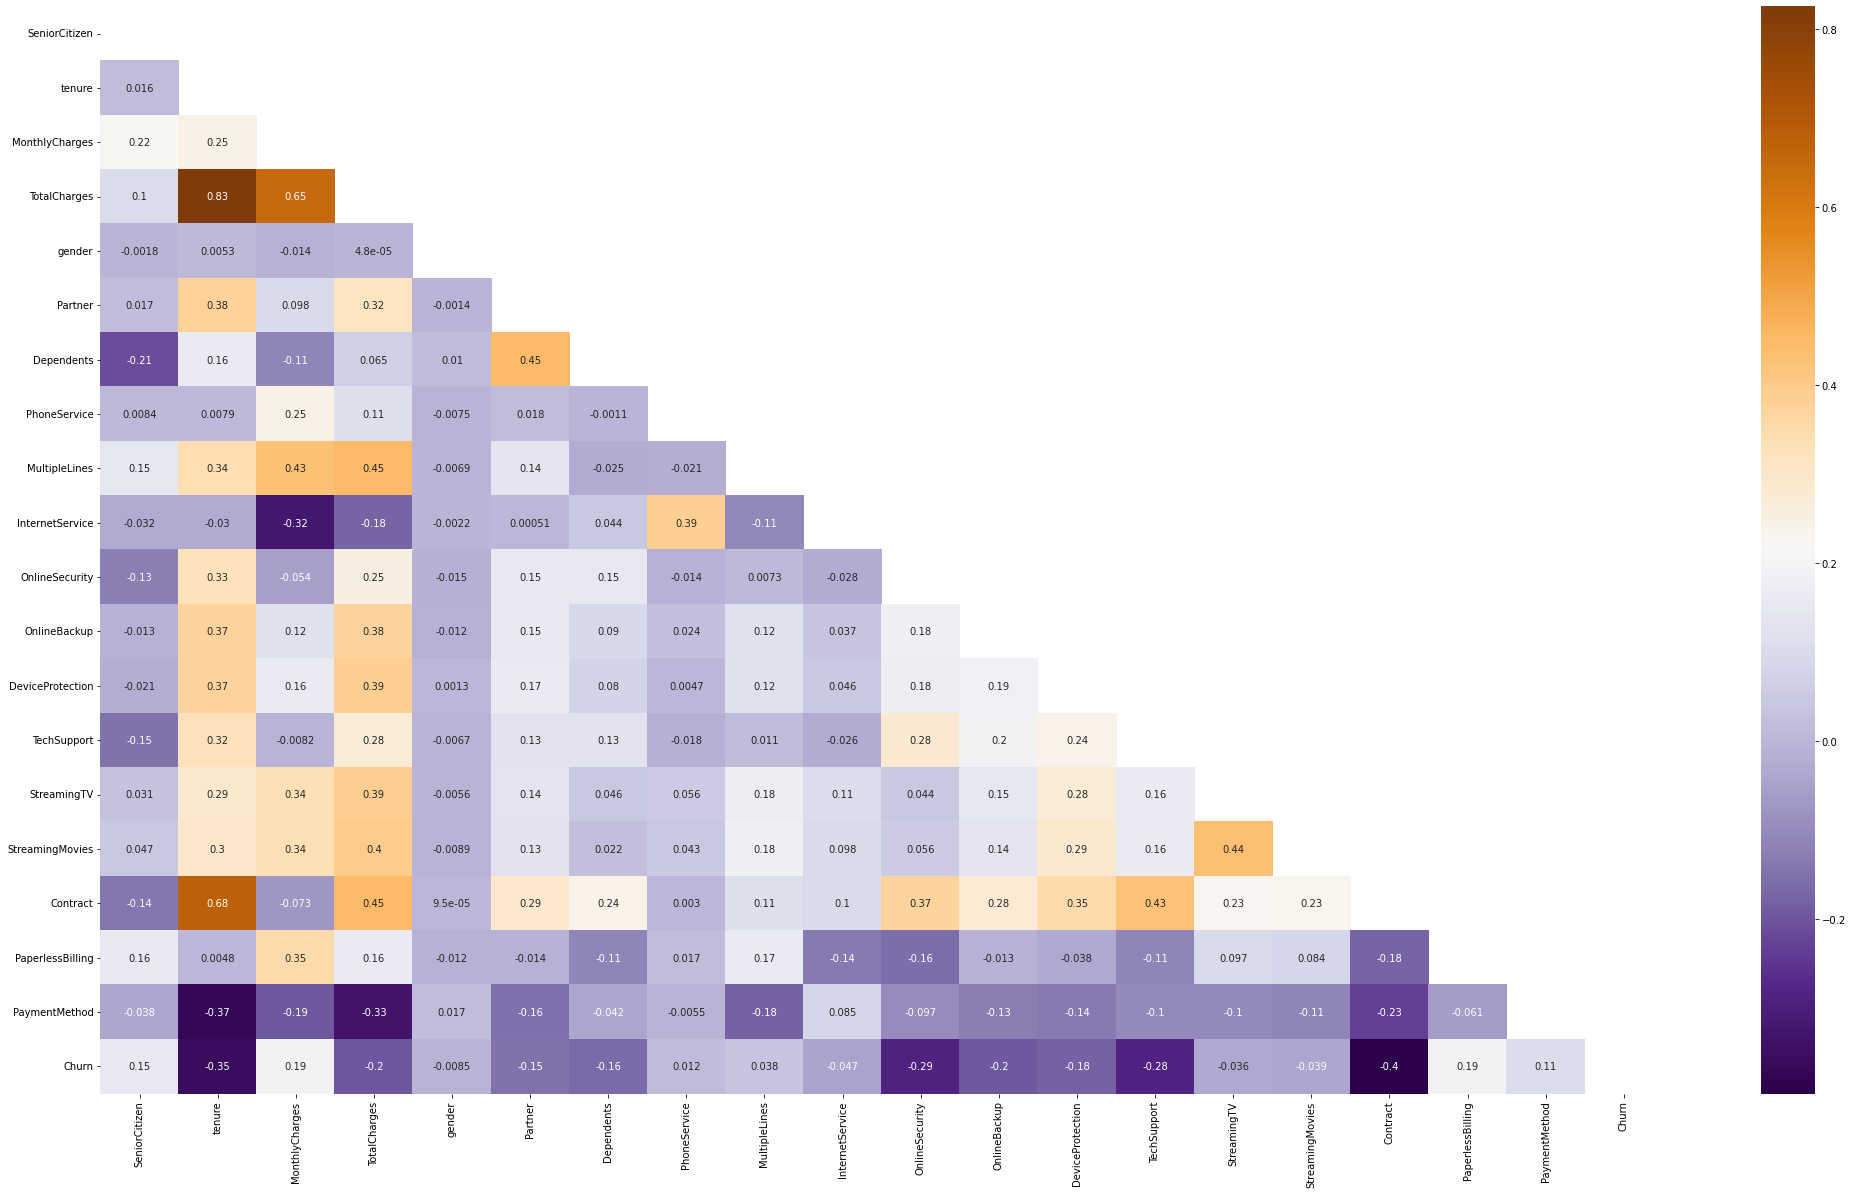

In [25]:
plt.figure(figsize = (35,20))
sns.heatmap(data_corr.corr(), annot = True, cmap = 'PuOr_r', mask = np.triu(data_corr.corr()))

plt.show()

Dapat dilihat bahwa kolom `Churn` memiliki korelasi positif paling tinggi dengan kolom `MonthlyCharges` dan `PaperlessBilling`. Untuk korelasi negatif paling tinggi dengan kolom `Churn`, dimiliki oleh kolom `Contract` dan `tenure`

# Data Preprocessing

In [27]:
data_model = data.copy()
data_model.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Untuk kolom `Churn`, value akan diubah menjadi 0 dan 1 untuk mempermudah proses prediksi. Sedangkan untuk kolom `SeniorCitizen`, akan diubah menjadi kolom kategorikal

In [28]:
data_model['Churn'].replace({'Yes': 1,'No': 0},inplace=True)

In [29]:
data_model['SeniorCitizen'].replace({1:'Yes', 0:'No'}, inplace = True)

In [30]:
data_model.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [31]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Splitting Data

In [32]:
X = data_model.drop('Churn', axis = 1)
y = data_model['Churn']

In [33]:
print('Presentase no churn:', '%.3f' % ((sum(data_model['Churn'] == 0)/len(data_model['Churn']))*100), '%')
print('Presentase churn   :', '%.3f' % ((sum(data_model['Churn'] == 1)/len(data_model['Churn']))*100), '%')

Presentase no churn: 73.422 %
Presentase churn   : 26.578 %


Dataset akan di split menjadi 3, yaitu training, validation, dan test data. Test data akan digunakan nantinya pada bagian Model Inference

In [34]:
X1, X_test, y1, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0, shuffle=True, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size = 0.2, random_state = 0, shuffle=True, stratify = y1)

In [35]:
# Melihat hasil splitting data

print('Presentase data yang digunakan untuk training data  :', '%.2f' % ((len(X_train)/len(X))*100), '%')
print('Presentase data yang digunakan untuk validation data:', '%.2f' % ((len(X_val)/len(X))*100), '%')
print('Presentase data yang digunakan untuk test data      :', '%.2f' % ((len(X_test)/len(X))*100), '%')
print()

print('Jumlah data training  :', X_train.shape[0])
print('Jumlah data validation:', X_val.shape[0])
print('Jumlah data test      :', X_test.shape[0])

Presentase data yang digunakan untuk training data  : 71.99 %
Presentase data yang digunakan untuk validation data: 18.00 %
Presentase data yang digunakan untuk test data      : 10.01 %

Jumlah data training  : 5062
Jumlah data validation: 1266
Jumlah data test      : 704


In [36]:
print('Presentase data churn')
print()
print('Data awal      :', '%.3f' % ((sum(data_model['Churn'] == 1)/len(data_model['Churn']))*100), '%')
print('Training data  :', '%.3f' % ((sum(y_train == 1)/len(y_train))*100), '%')
print('Validation data:', '%.3f' % ((sum(y_val == 1)/len(y_val))*100), '%')
print('Test data      :', '%.3f' % ((sum(y_test == 1)/len(y_test))*100), '%')

Presentase data churn

Data awal      : 26.578 %
Training data  : 26.571 %
Validation data: 26.619 %
Test data      : 26.562 %


Dapat dilihat bahwa presentase data Churn pada train, validation, dan test data sama dengan presentase pada data awal. Ini untuk memastikan bahwa data tersebar secara merata setelah proses splitting

## Features Scaling & Encoding

Sebelum melakukan model defining, akan dilakukan features scaling dan encoding terlebih dahulu
- Kolom kategorikal akan di-encode menggunakan OneHotEncoder
- Kolom numerikal akan di-scaling menggunakan StandardScaler

Kedua proses tersebut akan disatukan menjadi satu pipeline untuk mempermudah proses preprocessing data

**Train Data**

In [37]:
# Melihat kolom numerikal

num_train = X_train.select_dtypes(include=['int64', 'float64'])
num_train.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [38]:
# Melihat kolom kategorikal

cat_train = X_train.select_dtypes(include=['object'])
cat_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [39]:
for col in cat_train:
    print(col)
    print(cat_train[col].unique())
    print()

gender
['Male' 'Female']

SeniorCitizen
['No' 'Yes']

Partner
['No' 'Yes']

Dependents
['No' 'Yes']

PhoneService
['Yes' 'No']

MultipleLines
['No' 'Yes' 'No phone service']

InternetService
['Fiber optic' 'No' 'DSL']

OnlineSecurity
['No' 'No internet service' 'Yes']

OnlineBackup
['Yes' 'No internet service' 'No']

DeviceProtection
['No' 'No internet service' 'Yes']

TechSupport
['No' 'No internet service' 'Yes']

StreamingTV
['No' 'No internet service' 'Yes']

StreamingMovies
['Yes' 'No internet service' 'No']

Contract
['Month-to-month' 'Two year' 'One year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']



In [40]:
cat_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']

In [41]:
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [42]:
# Membuat pipeline untuk kolom numerikal

numerical_pipeline = Pipeline([
    ("select_numeric", OldDataFrameSelector(['tenure', 'MonthlyCharges', 'TotalCharges'])),
    ("std_scaler", StandardScaler()),
])

# Membuat pipeline untuk kolom kategorikal
categorical_pipeline = Pipeline([
    ("select_cat", OldDataFrameSelector(cat_col)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

# Menggabungkan kedua pipelines
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [43]:
# Preprocessing training data

X_train_trf = preprocess_pipeline.fit_transform(X_train)
X_train_trf

array([[ 0.78863137,  0.68292231,  0.9026574 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.51054754, -1.50294043, -0.82352216, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.47882016,  0.66128011,  1.58106992, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.4232373 ,  1.18901696,  0.88741811, ...,  0.        ,
         0.        ,  0.        ],
       [-0.59174622, -0.21439682, -0.58326115, ...,  1.        ,
         0.        ,  0.        ],
       [-1.28193502,  0.53142688, -0.97265576, ...,  0.        ,
         1.        ,  0.        ]])

In [44]:
X_train_trf.shape

(5062, 46)

Setelah preprocessing train data, terlihat bahwa sekarang kolom berjumlah 46

**Validation Data**

In [45]:
X_val.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1603,Female,No,No,No,15,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.65,994.55
4227,Male,No,Yes,Yes,69,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),80.65,5542.55
3588,Male,No,Yes,No,9,Yes,Yes,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),69.05,653.95
4696,Female,No,No,No,59,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Two year,No,Electronic check,95.80,5655.45
1182,Male,No,No,No,57,No,No phone service,DSL,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,53.75,3196.00


In [46]:
# Preprocessing validation data

X_val_trf = preprocess_pipeline.transform(X_val)
X_val_trf

array([[-0.71354424, -0.00629869, -0.57020205, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.47882016,  0.52643252,  1.43292732, ...,  0.        ,
         0.        ,  0.        ],
       [-0.95714029,  0.14020239, -0.72021653, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.42934886, -0.32260784, -0.47704861, ...,  0.        ,
         1.        ,  0.        ],
       [-0.75414358, -0.48742156, -0.71365395, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.43822082,  0.72121237,  1.58276562, ...,  0.        ,
         0.        ,  0.        ]])

In [47]:
X_val_trf.shape

(1266, 46)

# Model Defining

Pembuatan model Artificial Neural Network akan dilakukan dengan 2 cara, yaitu Sequential dan Functional

## Artificial Neural Network - Sequential

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [49]:
model_seq = keras.Sequential([                   
   keras.layers.Dense(32, input_shape=(46,), activation='relu'),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(16, activation='relu'), 
   keras.layers.Dropout(0.5),
   keras.layers.Dense(8, activation='relu'), 
   keras.layers.Dropout(0.5),
   keras.layers.Dense(1, activation='sigmoid')                         
])

model_seq.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

Dipilih relu sebagai activation dari hidden layers karena memiliki performa yang cepat dan dipilih sigmoid sebagai activation dari output layer karena target berupa angka binary (0 dan 1)

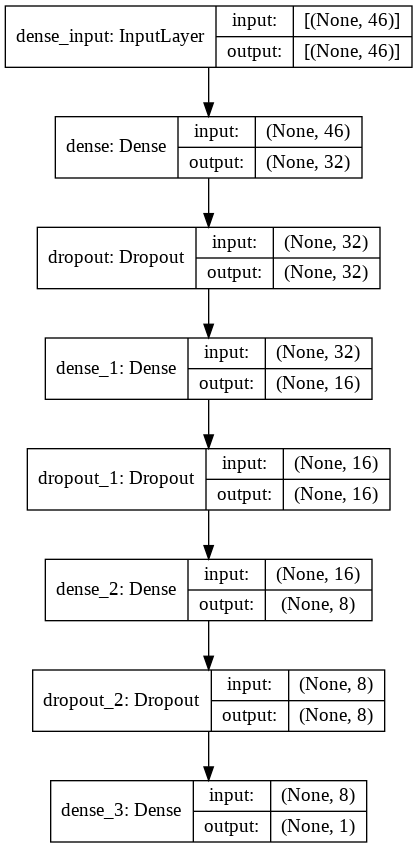

In [50]:
keras.utils.plot_model(model_seq, show_shapes=True)

In [51]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1504      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9

In [52]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

Akan dilakukan early stopping saat terlihat sudah tidak ada progress pada validation data

In [53]:
history = model_seq.fit(X_train_trf, y_train, epochs=100, batch_size=10, verbose = 1,
                    validation_data = (X_val_trf, y_val), callbacks=[early_stop])

Epoch 1/100
507/507 [==============================] - 2s 2ms/step - loss: 0.5669 - accuracy: 0.7280 - val_loss: 0.4870 - val_accuracy: 0.7354
Epoch 2/100
507/507 [==============================] - 1s 2ms/step - loss: 0.5034 - accuracy: 0.7416 - val_loss: 0.4756 - val_accuracy: 0.7638
Epoch 3/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4861 - accuracy: 0.7479 - val_loss: 0.4725 - val_accuracy: 0.7717
Epoch 4/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4779 - accuracy: 0.7550 - val_loss: 0.4693 - val_accuracy: 0.7749
Epoch 5/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4736 - accuracy: 0.7600 - val_loss: 0.4664 - val_accuracy: 0.7741
Epoch 6/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4645 - accuracy: 0.7574 - val_loss: 0.4629 - val_accuracy: 0.7875
Epoch 7/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4704 - accuracy: 0.7564 - val_loss: 0.4623 - val_accuracy: 0.7867

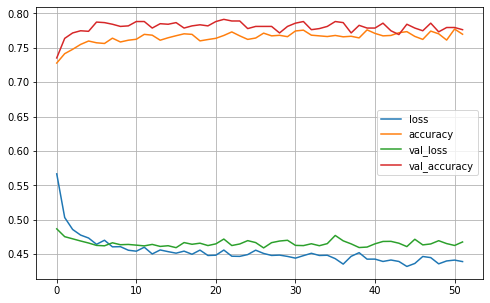

In [54]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [55]:
model_seq.evaluate(X_val_trf,y_val)

40/40 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.7765


[0.46793049573898315, 0.7764613032341003]

In [56]:
pred = model_seq.predict(X_val_trf)
y_pred_seq = []
for element in pred:
    if element > 0.5:
        y_pred_seq.append(1)
    else :
        y_pred_seq.append(0)

In [57]:
print(classification_report(y_val, y_pred_seq))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       929
           1       0.59      0.51      0.55       337

    accuracy                           0.78      1266
   macro avg       0.71      0.69      0.70      1266
weighted avg       0.77      0.78      0.77      1266



Dari grafik accuracy dan loss, terlihat bahwa performa training data dan validation data tidak jauh berbeda

Model memiliki accuracy senilai 0.78 dan recall senilai 0.51

## Artificial Neural Network - Functional API

In [58]:
np.random.seed(0)
tf.random.set_seed(0)

In [59]:
input_ = keras.layers.Input(shape=(46,))
hidden1 = keras.layers.Dense(32, activation="relu")(input_)
hidden2 = keras.layers.Dense(16, activation="relu")(hidden1)
output = keras.layers.Dense(1)(hidden2)
model_func = keras.models.Model(inputs=[input_], outputs=[output])

model_func.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics = ['accuracy'])

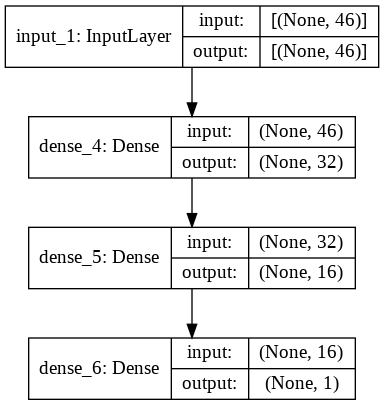

In [60]:
keras.utils.plot_model(model_func, show_shapes=True)

In [61]:
model_func.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 46)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1504      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model_func.fit(X_train_trf, y_train, epochs=100, verbose = 1,
                    validation_data = (X_val_trf, y_val), callbacks=[early_stop])

Epoch 1/100
159/159 [==============================] - 1s 3ms/step - loss: 2.2512 - accuracy: 0.7363 - val_loss: 0.6884 - val_accuracy: 0.7409
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7809 - val_loss: 0.5839 - val_accuracy: 0.7457
Epoch 3/100
159/159 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.7841 - val_loss: 0.6782 - val_accuracy: 0.7646
Epoch 4/100
159/159 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.7716 - val_loss: 0.6003 - val_accuracy: 0.7528
Epoch 5/100
159/159 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.7920 - val_loss: 0.6109 - val_accuracy: 0.7725
Epoch 6/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8001 - val_loss: 0.5469 - val_accuracy: 0.7765
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.8038 - val_loss: 0.5311 - val_accuracy: 0.7528

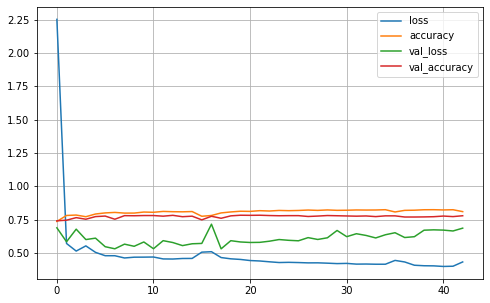

In [63]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [64]:
model_func.evaluate(X_val_trf,y_val)

40/40 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.7788


[0.6858064532279968, 0.7788309454917908]

In [65]:
pred = model_func.predict(X_val_trf)
y_pred_func = []
for element in pred:
    if element > 0.5:
        y_pred_func.append(1)
    else :
        y_pred_func.append(0)

In [66]:
print(classification_report(y_val, y_pred_func))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       929
           1       0.62      0.45      0.52       337

    accuracy                           0.78      1266
   macro avg       0.72      0.67      0.69      1266
weighted avg       0.76      0.78      0.77      1266



Dari grafik, terlihat bahwa terdapat perpedaan yang cukup jauh antara loss dari validation data (0.68) dan training data(0.43). Terdapat kemungkinan bahwa model mengalami overfitting

Model memiliki accuracy yang sama dengan model sebelumnya, yaitu 0.78. Akan tetapi memiliki recall yang lebih rendah, senilai 0.45

# Model Improvement

Pada bagian ini, akan dibuat beberapa model dengan architectures berbeda dengan tujuan meningkatkan performa model sequential dan juga functional. Di bagian Model Evaluation, semua model yang sudah dibuat akan dibandingkan. Model dengan performa terbaik akan di-save dan digunakan pada bagian Model Inference

## Functional API with Dropout

Untuk mengatasi masalah overfitting model functional, akan dibuat model dengan dropout

In [67]:
keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

In [68]:
input_ = keras.layers.Input(shape=(46,))
hidden1 = keras.layers.Dense(32, activation="relu")(input_)
drop1 = keras.layers.Dropout(0.5)(hidden1)
hidden2 = keras.layers.Dense(16, activation="relu")(input_)
drop2 = keras.layers.Dropout(0.5)(hidden2)
output = keras.layers.Dense(1,activation="sigmoid")(drop2)
model_func2 = keras.models.Model(inputs=[input_], outputs=[output])

model_func2.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics = ['accuracy'])

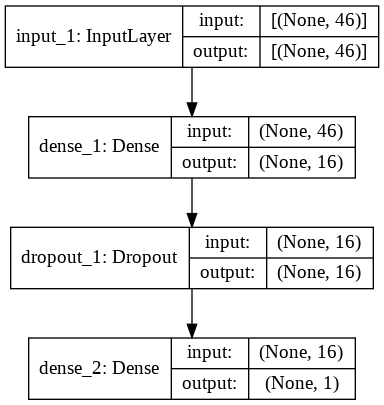

In [69]:
keras.utils.plot_model(model_func2, show_shapes=True)

In [70]:
model_func2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 46)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                752       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model_func2.fit(X_train_trf, y_train, epochs=100, batch_size=10, verbose = 1,
                    validation_data = (X_val_trf, y_val), callbacks=[early_stop])

Epoch 1/100
507/507 [==============================] - 1s 2ms/step - loss: 0.5099 - accuracy: 0.7452 - val_loss: 0.4587 - val_accuracy: 0.7883
Epoch 2/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4486 - accuracy: 0.7868 - val_loss: 0.4549 - val_accuracy: 0.7788
Epoch 3/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4481 - accuracy: 0.7900 - val_loss: 0.4582 - val_accuracy: 0.7883
Epoch 4/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4394 - accuracy: 0.7963 - val_loss: 0.4549 - val_accuracy: 0.7820
Epoch 5/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4292 - accuracy: 0.8013 - val_loss: 0.4549 - val_accuracy: 0.7836
Epoch 6/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4321 - accuracy: 0.7957 - val_loss: 0.4502 - val_accuracy: 0.7867
Epoch 7/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4321 - accuracy: 0.7979 - val_loss: 0.4510 - val_accuracy: 0.7867

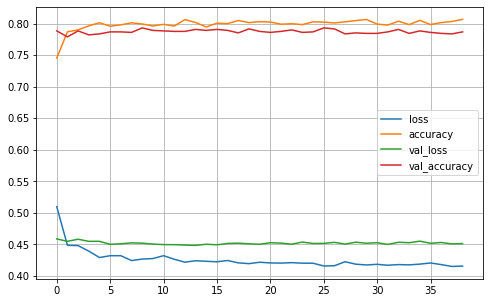

In [72]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [73]:
model_func2.evaluate(X_val_trf,y_val)

40/40 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.7867


[0.4513321816921234, 0.7867298722267151]

In [74]:
pred = model_func2.predict(X_val_trf)
y_pred_func2 = []
for element in pred:
    if element > 0.5:
        y_pred_func2.append(1)
    else :
        y_pred_func2.append(0)

In [75]:
print(classification_report(y_val, y_pred_func2))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       929
           1       0.64      0.46      0.53       337

    accuracy                           0.79      1266
   macro avg       0.73      0.68      0.70      1266
weighted avg       0.77      0.79      0.77      1266



Dapat dilihat bahwa perbedaan antara loss validation data dan training data sudah menipis, 0.451 untuk validation data dan 0.415 untuk training data. Nilai loss model dengan dropout juga lebih kecil dibandingkan model tanpa dropout

Accuracy model ini sedikit lebih tinggi (0.79) dibandingkan model tanpa dropout (0.78). Nilai recall juga sedikit bertambah. Dari 0.45 menjadi 0.46

## Functional API with Dropout and Concat Layer

Akan dicoba juga model dengan concat layer

In [76]:
keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

In [77]:
input_ = keras.layers.Input(shape=(46,))
hidden1 = keras.layers.Dense(32, activation="relu")(input_)
drop1 = keras.layers.Dropout(0.5)(hidden1)
hidden2 = keras.layers.Dense(16, activation="relu")(input_)
drop2 = keras.layers.Dropout(0.5)(hidden2)
concat = keras.layers.concatenate([input_, drop1, drop2])
output = keras.layers.Dense(1,activation="sigmoid")(concat)
model_func3 = keras.models.Model(inputs=[input_], outputs=[output])

model_func3.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics = ['accuracy'])

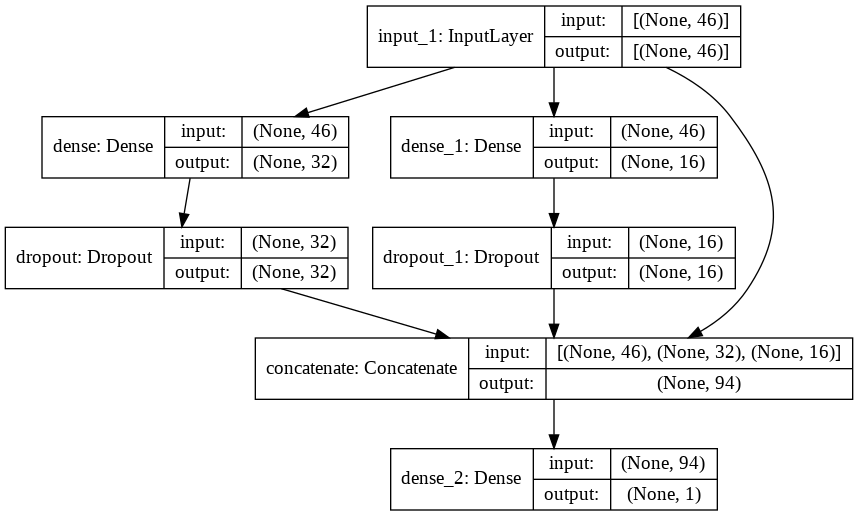

In [78]:
keras.utils.plot_model(model_func3, show_shapes=True)

In [79]:
model_func3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 46)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           1504        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 16)           752         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 32)           0           dense[0][0]                      
______________________________________________________________________________________________

In [80]:
history = model_func3.fit(X_train_trf, y_train, epochs=100, batch_size=10, verbose = 1,
                    validation_data = (X_val_trf, y_val), callbacks=[early_stop])

Epoch 1/100
507/507 [==============================] - 2s 2ms/step - loss: 0.4662 - accuracy: 0.7766 - val_loss: 0.4560 - val_accuracy: 0.7812
Epoch 2/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4244 - accuracy: 0.7969 - val_loss: 0.4533 - val_accuracy: 0.7852
Epoch 3/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4166 - accuracy: 0.8023 - val_loss: 0.4551 - val_accuracy: 0.7915
Epoch 4/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4187 - accuracy: 0.7993 - val_loss: 0.4528 - val_accuracy: 0.7923
Epoch 5/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4131 - accuracy: 0.8038 - val_loss: 0.4560 - val_accuracy: 0.7907
Epoch 6/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4104 - accuracy: 0.8082 - val_loss: 0.4530 - val_accuracy: 0.7875
Epoch 7/100
507/507 [==============================] - 1s 2ms/step - loss: 0.4082 - accuracy: 0.8094 - val_loss: 0.4547 - val_accuracy: 0.7780

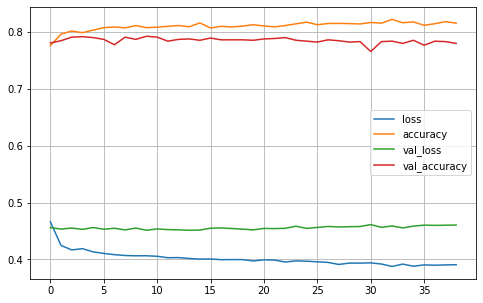

In [81]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [82]:
model_func3.evaluate(X_val_trf,y_val)

40/40 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.7804


[0.46043047308921814, 0.7804107666015625]

In [83]:
pred = model_func3.predict(X_val_trf)
y_pred_func3 = []
for element in pred:
    if element > 0.5:
        y_pred_func3.append(1)
    else :
        y_pred_func3.append(0)

In [84]:
print(classification_report(y_val, y_pred_func3))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       929
           1       0.60      0.52      0.56       337

    accuracy                           0.78      1266
   macro avg       0.72      0.70      0.71      1266
weighted avg       0.77      0.78      0.78      1266



Dapat dilihat bahwa terdapat perbedaan yang cukup jauh antara loss validation data (0.46) dan training data (0.39), walaupun perbedaannya tidak sejauh model functional tanpa dropout

Model ini memiliki accuracy senilai 0.78 dan recall senilai 0.52. Dibandingkan model functional lainnya, model ini memiliki nilai recall paling tinggi

## Hyperparameter Tuning with GridSearchCV

Untuk model improvement model sequential, akan dilakukan melalui Hyperparameter Tuning dengan GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [86]:
def create_model(init_mode = 'uniform', activation = 'relu', dropout_rate= 0.5, optimizers = keras.optimizers.Adam(learning_rate=1e-3)):
    model = Sequential()
    model.add(Dense(32, kernel_initializer = init_mode, activation = activation, input_shape=(46,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, kernel_initializer = init_mode, activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, kernel_initializer = init_mode, activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer = init_mode, activation = 'sigmoid'))
    model.compile(optimizer = optimizers, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [87]:
model = KerasClassifier(build_fn = create_model, verbose = 1)

In [88]:
params=[
        {'init_mode' :['glorot_uniform', 'uniform', 'normal'], 
         'activation':['relu'],
         'dropout_rate' :[0.3, 0.5], 
         'batch_size':[10, 15], 
         'epochs':[50]}]

grid = GridSearchCV(estimator = model, param_grid = params, n_jobs = -1, cv = 3)
grid_result = grid.fit(X_train_trf, y_train)

Epoch 1/50
338/338 [==============================] - 1s 2ms/step - loss: 0.5353 - accuracy: 0.7335
Epoch 2/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4668 - accuracy: 0.7343
Epoch 3/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4671 - accuracy: 0.7343
Epoch 4/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4615 - accuracy: 0.7343
Epoch 5/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4594 - accuracy: 0.7353
Epoch 6/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4608 - accuracy: 0.7679
Epoch 7/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4553 - accuracy: 0.7868
Epoch 8/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4537 - accuracy: 0.7934
Epoch 9/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4514 - accuracy: 0.7864
Epoch 10/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4558 - accuracy: 0.7951

In [89]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.803635 using {'activation': 'relu', 'batch_size': 15, 'dropout_rate': 0.5, 'epochs': 50, 'init_mode': 'normal'}


Didapat best accuracy score senilai 0.80, dengan best parameters sebagai berikut:

'activation': 'relu', 'batch_size': 15, 'dropout_rate': 0.5, 'epochs': 50, 'init_mode': 'normal'

Kombinasi parameter terbaik akan diaplikasikan pada proses model defining

In [90]:
model_grid = Sequential()
model_grid.add(Dense(32, kernel_initializer = 'normal', activation = 'relu', input_shape=(46,)))
model_grid.add(Dropout(0.5))
model_grid.add(Dense(16, kernel_initializer = 'normal', activation = 'relu'))
model_grid.add(Dropout(0.5))
model_grid.add(Dense(8, kernel_initializer = 'normal', activation = 'relu'))
model_grid.add(Dropout(0.5))
model_grid.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

model_grid.compile(optimizer = keras.optimizers.Adam(learning_rate=1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [91]:
history = model_grid.fit(X_train_trf, y_train, epochs=50, batch_size=15, verbose = 1, 
                         validation_data = (X_val_trf, y_val), callbacks=[early_stop])

Epoch 1/50
338/338 [==============================] - 1s 3ms/step - loss: 0.5267 - accuracy: 0.7341 - val_loss: 0.4732 - val_accuracy: 0.7338
Epoch 2/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4653 - accuracy: 0.7343 - val_loss: 0.4681 - val_accuracy: 0.7338
Epoch 3/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4626 - accuracy: 0.7343 - val_loss: 0.4668 - val_accuracy: 0.7338
Epoch 4/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4574 - accuracy: 0.7402 - val_loss: 0.4664 - val_accuracy: 0.7867
Epoch 5/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.8015 - val_loss: 0.4730 - val_accuracy: 0.7820
Epoch 6/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4605 - accuracy: 0.7967 - val_loss: 0.4639 - val_accuracy: 0.7757
Epoch 7/50
338/338 [==============================] - 1s 2ms/step - loss: 0.4511 - accuracy: 0.8001 - val_loss: 0.4643 - val_accuracy: 0.7836
Epoch 

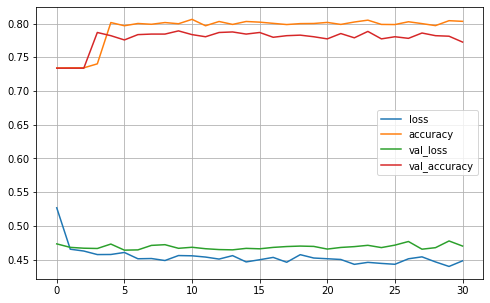

In [92]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [93]:
model_grid.evaluate(X_val_trf,y_val)

40/40 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.7725


[0.4699961543083191, 0.7725118398666382]

In [94]:
pred = model_grid.predict(X_val_trf)
y_pred_grid = []
for element in pred:
    if element > 0.5:
        y_pred_grid.append(1)
    else :
        y_pred_grid.append(0)

In [95]:
print(classification_report(y_val, y_pred_grid))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       929
           1       0.57      0.56      0.57       337

    accuracy                           0.77      1266
   macro avg       0.71      0.71      0.71      1266
weighted avg       0.77      0.77      0.77      1266



Terdapat sedikit perbedaan antara performa model pada validation data dan training data, tetapi masih bisa ditolerir. Loss dari validation data adalah senilai 0.47 dan loss dari training data senilai 0.45

Model ini memiliki accuracy yang sedikit lebih rendah dibandingkan model lainnya, yaitu senilai 0.77. Namun, memiliki nilai recall paling tinggi, senilai 0.57

# Model Evaluation

In [96]:
print('Sequential')
print(classification_report(y_val, y_pred_seq))
print('-'*35)

print('Functional API')
print(classification_report(y_val, y_pred_func))
print('-'*35)

print('Functional API with Dropout')
print(classification_report(y_val, y_pred_func2))
print('-'*35)

print('Functional API with Dropout and Concat Layer')
print(classification_report(y_val, y_pred_func3))
print('-'*35)

print('Sequential with GridSearchCV')
print(classification_report(y_val, y_pred_grid))

Sequential
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       929
           1       0.59      0.51      0.55       337

    accuracy                           0.78      1266
   macro avg       0.71      0.69      0.70      1266
weighted avg       0.77      0.78      0.77      1266

-----------------------------------
Functional API
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       929
           1       0.62      0.45      0.52       337

    accuracy                           0.78      1266
   macro avg       0.72      0.67      0.69      1266
weighted avg       0.76      0.78      0.77      1266

-----------------------------------
Functional API with Dropout
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       929
           1       0.64      0.46      0.53       337

    accuracy                           0.79      1266
  

Dari semua model yang sudah dibuat, akan **dipilih model sequential setelah proses hyperparameter tuning dengan GridSearchCV** karena accuracy nya tidak jauh berbeda dari model lain, tetapi menghasilkan nilai recall yang paling tinggi

# Model Saving

Model yang sudah dipilih akan di save

In [97]:
model_grid.save('churn_final.h5')

# Model Inference

Model Inference akan menggunakan test data yang sudah dipisahkan di awal. Sama halnya dengan training dan validation data, akan dilakukan preprocessing terlebih dahulu menggunakan pipeline yang sudah dibuat, sebelum proses prediksi

In [98]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3100,Female,No,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),94.45,5073.10
2794,Female,No,No,No,28,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,56.05,1522.65
3944,Female,No,Yes,Yes,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.25,172.35
2353,Male,No,No,No,3,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.35,253.80
2405,Female,No,Yes,Yes,8,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,777.30


In [99]:
# Preprocessing test data

X_test_trf = preprocess_pipeline.transform(X_test)
X_test_trf

array([[ 0.91042939,  0.98591319,  1.22616191, ...,  1.        ,
         0.        ,  0.        ],
       [-0.18575281, -0.29264171, -0.33760473, ...,  0.        ,
         1.        ,  0.        ],
       [-0.95714029, -1.4846278 , -0.93233331, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.30755083, -0.30928956, -0.38929057, ...,  1.        ,
         0.        ,  0.        ],
       [-0.4699482 ,  1.26393229, -0.07884516, ...,  0.        ,
         1.        ,  0.        ],
       [-0.26695149,  0.62964919, -0.09626464, ...,  0.        ,
         1.        ,  0.        ]])

In [100]:
# Predicting test data

pred = model_grid.predict(X_test_trf)
y_pred_inf = []
for element in pred:
    if element > 0.5:
        y_pred_inf.append(1)
    else :
        y_pred_inf.append(0)

In [101]:
print(classification_report(y_test, y_pred_inf))
print('-'*35)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_inf))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       517
           1       0.61      0.62      0.62       187

    accuracy                           0.79       704
   macro avg       0.74      0.74      0.74       704
weighted avg       0.80      0.79      0.79       704

-----------------------------------
Confusion Matrix
[[443  74]
 [ 71 116]]


Performa model pada test data menghasilkan accuracy senilai 0.79 dan nilai recall sebesar 0.62

Model berhasil memprediksi 116 pelanggan Churn dengan akurat. Tetapi masih terdapat 71 pelanggan Churn yang diprediksi sebagai no Churn dan 74 pelanggan yang tidak berencana Churn yang diprediksi sebagai Churn

# Conclusion

Dari **Data Exploration**, didapat bahwa:
Dari plot kolom numerikal, dapat dilihat bahwa:
- Untuk kolom tenure, data pelanggan yang Churn cenderung memiliki tenure yang lebih rendah
- Pelanggan yang Tidak Churn kebanyakan bukan tergolong sebagai lansia
- Data pelanggan Churn memiliki monthly charges yang lebih tinggi
- Akan tetapi, apabila dilihat dari TotalCharges, data pelanggan Churn memiliki total yang lebih rendah

Dari data demographic pelanggan, dapat dilihat bahwa:
- Data pelanggan wanita dan pria seimbang
- Data pelanggan Churn lebih banyak yang tidak memiliki partner ataupun dependents

Dari data layanan yang tersedia, dapat dilihat bahwa pelanggan yang Churn banyak yang:
- Berlangganan internet fiber optic
- Tidak memiliki online security
- Tidak memiliki online backup
- Tidak memiliki device protection
- Tidak memiliki tech support

Dari account info pelanggan, dapat dilihat bahwa pelanggan yang Churn banyak yang:
- Berlangganan bulanan
- Menerima bill secara elektronik
- Melakukan pembayaran melalui electronic check

Dapat dilihat bahwa kolom `Churn` memiliki korelasi positif paling tinggi dengan kolom `MonthlyCharges` dan `PaperlessBilling`. Untuk korelasi negatif paling tinggi dengan kolom `Churn`, dimiliki oleh kolom `Contract` dan `tenure`
***
Pada **Data Preprocessing**, dibuat pipeline untuk proses:
- Encoding kolom kategorikal menggunakan OneHotEncoder
- Scaling kolom numerikal menggunakan StandardScaler
***
Pada **Model Defining**, dibuat model Artificial Neural Network menggunakan cara Sequential dan Functional. Pada **Model Improvement**, dibuat beberapa model baru untuk meningkatkan performa kedua model tersebut. Untuk model Sequential, dilakukan hyperparameter tuning menggunakan GridSearchCV. Untuk model functional, dibuat model dengan dropout dan concat layer

Setelah semua model dibandingkan, diputuskan untuk dipilih model sequential setelah proses hyperparameter tuning dengan GridSearchCV karena menghasilkan accuracy yang tidak jauh berbeda dari model lainnya, tetapi memiliki nilai recall yang paling tinggi
***
Pada **Model Inference**, model berhasil memprediksi 116 pelanggan Churn dengan akurat. Tetapi masih terdapat 71 pelanggan Churn yang diprediksi sebagai no Churn dan 74 pelanggan yang tidak berencana Churn yang diprediksi sebagai 
***
Saran untuk kedepannya, dapat dilakukan oversampling untuk melihat apakah hal tersebut dapat meningkatkan performa model atau tidak